In [5]:
pd.set_option('display.float_format', '{:.2f}'.format)
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.figsize'] = (10,5)

### 선형회귀모형

 - $\hat y = f(x) \approx y$
---
#### 상수항 결합 

 - 상수항을 독립변수 데이터에 추가

 - $X_a^TW_a = W_a^TX_a$

In [3]:
X0 = np.arange(10).reshape(5,2)
X0

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [4]:
import statsmodels.api as sm

X = sm.add_constant(X0)
X

array([[1., 0., 1.],
       [1., 2., 3.],
       [1., 4., 5.],
       [1., 6., 7.],
       [1., 8., 9.]])

---
#### 최소자승법

 - $\hat y = Xw$
 ---
 
 $RSS$ 
 
 $= e^Te$ 
 
 $= (y-Xw)^T(y-Xw)$
 
 $= y^Ty - 2y^TXw + w^TX^TXw$

 $= \frac{dRSS}{dw} = 0$
 
 $= X^TXw^* = X^Ty$
 
---
#### 직교 방정식

 $X^Ty - X^TXw = 0$
 
 $X^T(y-Xw) = 0$
 
 $X^Te = 0$
 
--- 

$c_d^Te = 0$ or 
$c_d \perp e$

--- 

#### 직교의 성질 

 1. 잔차의 평균은 0
 
  - $\sum_{i=0}^Ne_i = 0$
  
 2. x데이터의 평균$ \bar x$의 예측값은 y데이터의 평균 $\bar y$
  
  - $\bar y = w^T\bar x$

#### Numpy

In [6]:
from sklearn.datasets import make_regression

bias = 100
X0 , y , w = make_regression(
    n_samples = 200, n_features =1, bias = bias , noise = 10, coef = True, random_state =1
)
X = sm.add_constant(X0)
y = y.reshape(len(y),1)


In [7]:
w

array(86.44794301)

In [8]:
w = np.linalg.inv(X.T @ X) @ X.T @ y
w

array([[99.79150869],
       [86.96171201]])

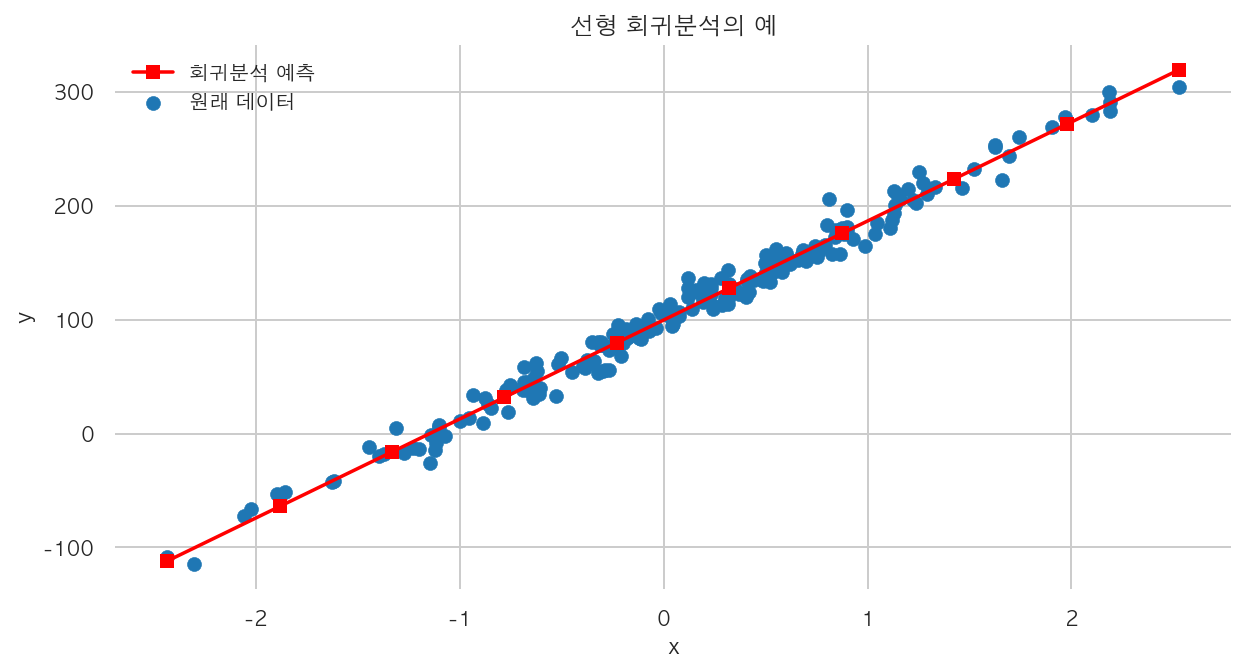

In [9]:
x_new = np.linspace(np.min(X0), np.max(X0), 10)
X_new = sm.add_constant(x_new)
y_new = np.dot(X_new, w)

plt.scatter(X0, y, label="원래 데이터")
plt.plot(x_new, y_new, 'rs-', label="회귀분석 예측")
plt.xlabel("x")
plt.ylabel("y")
plt.title("선형 회귀분석의 예")
plt.legend()

---

####  scikit-learn

In [14]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X0,y)
print(model.intercept_, model.coef_)

[99.79150869] [[86.96171201]]


- coef_ : 추정된 가중치 벡터
- intercept_ : 추정된 상수항

predict : 새로운 입력 데이터에 대한 출력 데이터 예측

In [15]:
model.predict([[-2],[-1],[0],[1],[2]])

array([[-74.13191534],
       [ 12.82979668],
       [ 99.79150869],
       [186.7532207 ],
       [273.71493272]])

---

- OLS 

    - 독립변수와 종속변수가 모두 포함된 데이터 프레임생성, 상수항 결합은 X

In [32]:
df = pd.DataFrame({'x':X0[:,0],'y':y[:,0]})
df.tail()

,x,y
195,-0.17,87.87
196,-1.20,-13.63
197,1.46,216.11
198,1.13,212.74
199,0.50,150.02


In [33]:
dfy = df[['y']]
dfx = sm.add_constant(df[['x']]) # 상수합결합은 수동
model = sm.OLS(dfy,dfx)
result = model.fit()

In [34]:
model = sm.OLS.from_formula('y~x', data =df)
result = model.fit()

In [35]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 1.278e+04
Date:                Tue, 25 Feb 2020   Prob (F-statistic):          8.17e-182
Time:                        15:43:50   Log-Likelihood:                -741.28
No. Observations:                 200   AIC:                             1487.
Df Residuals:                     198   BIC:                             1493.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     99.7915      0.705    141.592      0.0

In [36]:
result.predict({'x':[-2,-1,0,1,2]})

0   -74.13
1    12.83
2    99.79
3   186.75
4   273.71
dtype: float64

- params : 가중치벡터
- resid : 잔차벡터

In [38]:
result.params

Intercept   99.79
x           86.96
dtype: float64

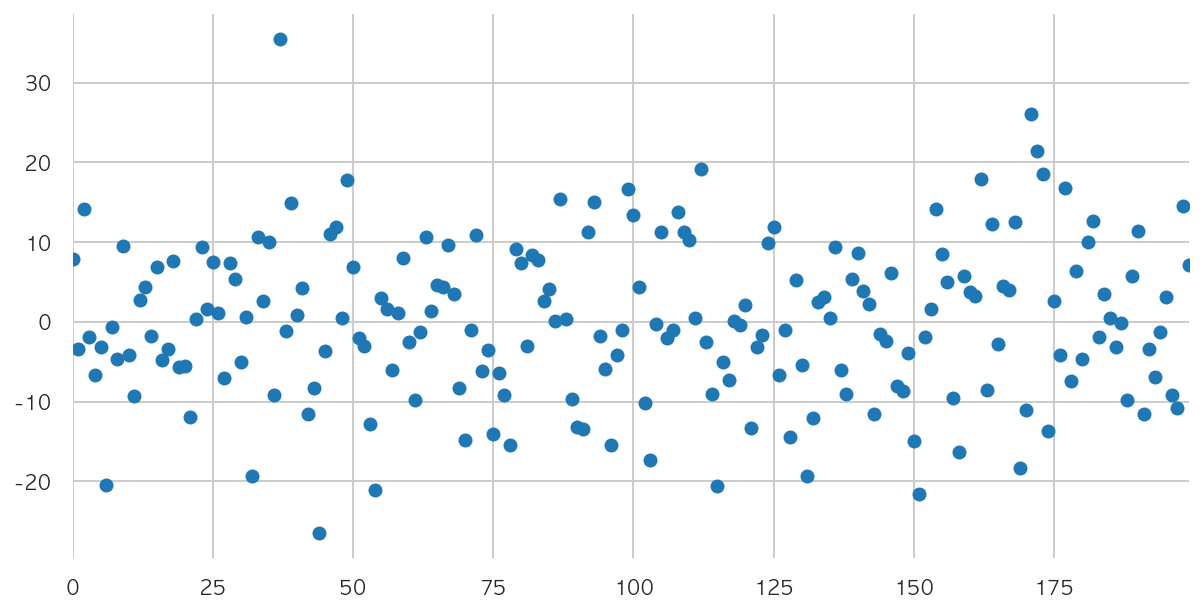

In [40]:
result.resid.plot(style = 'o')
plt.show()

In [41]:
result.resid.sum()

3.7196912217041245e-12

In [42]:
result.predict({'x': X0.mean()})

0   109.07
dtype: float64

In [43]:
y.mean()

109.06935068170773

In [44]:
from sklearn.datasets import load_boston

boston = load_boston()

dfX0 = pd.DataFrame(boston.data, columns=boston.feature_names)
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])

model_boston2 = sm.OLS(dfy, dfX)
result_boston2 = model_boston2.fit()
print(result_boston2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 25 Feb 2020   Prob (F-statistic):          6.72e-135
Time:                        15:53:36   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0